# COHORT ANALYSIS AND RFM SEGMENTATION

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("passs_FY2014.csv")

In [3]:
df.head()

,PO_NUMBER,AGENCY,COMMODITY,VENDOR_NAME,ORDERED_DATE,PO_AMOUNT
0,PO240430-V4,DEPARTMENT ON DISABILITY SERVICES,"9187850:CONSULTING SERVICES, MEDICAL",PATRICIA R. COTT,16-Sep-13,"6,344.63"
1,PO250372-V3,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9625800:Professional Services (Not Otherwise C...,EDAW,27-Sep-13,"551,683.84"
2,PO253676-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9180000:CONSULTING SERVICES,JONES LANG LASALLE,27-Sep-13,"62,809.00"
3,PO256208-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9180000:CONSULTING SERVICES,LOUIS BERGER & ASSOCIATES,27-Sep-13,"68,497.41"
4,PO266406-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,"9614900:Legal Services, Attorneys",LEFTWICH & LUDAWAY,27-Sep-13,"113,075.86"


In [4]:
df.describe()

,PO_NUMBER,AGENCY,COMMODITY,VENDOR_NAME,ORDERED_DATE,PO_AMOUNT
count,14946,14946,14946,14946,14946,14946
unique,12714,81,2518,4301,131,9669
top,PO488419,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,9625800:Professional Services (Not Otherwise C...,"OST, Inc.",27-Sep-13,"10,000.00"
freq,32,3959,1362,860,435,288


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14946 entries, 0 to 14945
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PO_NUMBER     14946 non-null  object
 1   AGENCY        14946 non-null  object
 2   COMMODITY     14946 non-null  object
 3   VENDOR_NAME   14946 non-null  object
 4   ORDERED_DATE  14946 non-null  object
 5   PO_AMOUNT     14946 non-null  object
dtypes: object(6)
memory usage: 700.7+ KB


In [6]:
df["ORDERED_DATE"] = pd.to_datetime(df["ORDERED_DATE"])

In [7]:
df['PO_AMOUNT'] = df['PO_AMOUNT'].replace('-', np.NaN)

In [8]:
df["PO_AMOUNT"] = df["PO_AMOUNT"].str.replace(',', "").astype('float')

# Cohort Analysis 

### Assigning acquisition month cohort

In [9]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [10]:
df['ORDER_MONTH'] = df['ORDERED_DATE'].apply(get_month)
grouping = df.groupby('VENDOR_NAME')['ORDER_MONTH']
df['COHORT_MONTH'] = grouping.transform('min')
df.head()

,PO_NUMBER,AGENCY,COMMODITY,VENDOR_NAME,ORDERED_DATE,PO_AMOUNT,ORDER_MONTH,COHORT_MONTH
0,PO240430-V4,DEPARTMENT ON DISABILITY SERVICES,"9187850:CONSULTING SERVICES, MEDICAL",PATRICIA R. COTT,2013-09-16,6344.63,2013-09-01,2013-09-01
1,PO250372-V3,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9625800:Professional Services (Not Otherwise C...,EDAW,2013-09-27,551683.84,2013-09-01,2013-09-01
2,PO253676-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9180000:CONSULTING SERVICES,JONES LANG LASALLE,2013-09-27,62809.00,2013-09-01,2013-09-01
3,PO256208-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9180000:CONSULTING SERVICES,LOUIS BERGER & ASSOCIATES,2013-09-27,68497.41,2013-09-01,2013-09-01
4,PO266406-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,"9614900:Legal Services, Attorneys",LEFTWICH & LUDAWAY,2013-09-27,113075.86,2013-09-01,2013-09-01


In [11]:
# extracting year,month and day integer values
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [12]:
order_year, order_month, _ = get_date_int(df, 'ORDER_MONTH')
cohort_year, cohort_month, _ = get_date_int(df, 'COHORT_MONTH')
years_diff = order_year - cohort_year
months_diff = order_month - cohort_month
df['COHORT_INDEX'] = years_diff * 12 + months_diff + 1
df.head()

,PO_NUMBER,AGENCY,COMMODITY,VENDOR_NAME,ORDERED_DATE,PO_AMOUNT,ORDER_MONTH,COHORT_MONTH,COHORT_INDEX
0,PO240430-V4,DEPARTMENT ON DISABILITY SERVICES,"9187850:CONSULTING SERVICES, MEDICAL",PATRICIA R. COTT,2013-09-16,6344.63,2013-09-01,2013-09-01,1
1,PO250372-V3,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9625800:Professional Services (Not Otherwise C...,EDAW,2013-09-27,551683.84,2013-09-01,2013-09-01,1
2,PO253676-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9180000:CONSULTING SERVICES,JONES LANG LASALLE,2013-09-27,62809.00,2013-09-01,2013-09-01,1
3,PO256208-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,9180000:CONSULTING SERVICES,LOUIS BERGER & ASSOCIATES,2013-09-27,68497.41,2013-09-01,2013-09-01,1
4,PO266406-V2,DEPUTY MAYOR FOR ECONOMIC DEVELOPMENT,"9614900:Legal Services, Attorneys",LEFTWICH & LUDAWAY,2013-09-27,113075.86,2013-09-01,2013-09-01,1


In [13]:
grouping = df.groupby(['COHORT_MONTH', 'COHORT_INDEX'])
cohort_data = grouping['VENDOR_NAME'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(
    index='COHORT_MONTH', columns='COHORT_INDEX', values='VENDOR_NAME')
cohort_counts

COHORT_INDEX,1,2,3,4,5,6
COHORT_MONTH,,,,,,
2013-09-01,1397.0,451.0,493.0,368.0,389.0,362.0
2013-10-01,757.0,137.0,128.0,88.0,93.0,NaN
2013-11-01,756.0,79.0,114.0,86.0,NaN,NaN
2013-12-01,472.0,46.0,41.0,NaN,NaN,NaN
2014-01-01,523.0,41.0,NaN,NaN,NaN,NaN
2014-02-01,396.0,NaN,NaN,NaN,NaN,NaN


In [14]:
cohort_sizes = cohort_counts.iloc[:, 0]

In [15]:
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [16]:
retention.round(3) * 100

COHORT_INDEX,1,2,3,4,5,6
COHORT_MONTH,,,,,,
2013-09-01,100.0,32.3,35.3,26.3,27.8,25.9
2013-10-01,100.0,18.1,16.9,11.6,12.3,NaN
2013-11-01,100.0,10.4,15.1,11.4,NaN,NaN
2013-12-01,100.0,9.7,8.7,NaN,NaN,NaN
2014-01-01,100.0,7.8,NaN,NaN,NaN,NaN
2014-02-01,100.0,NaN,NaN,NaN,NaN,NaN


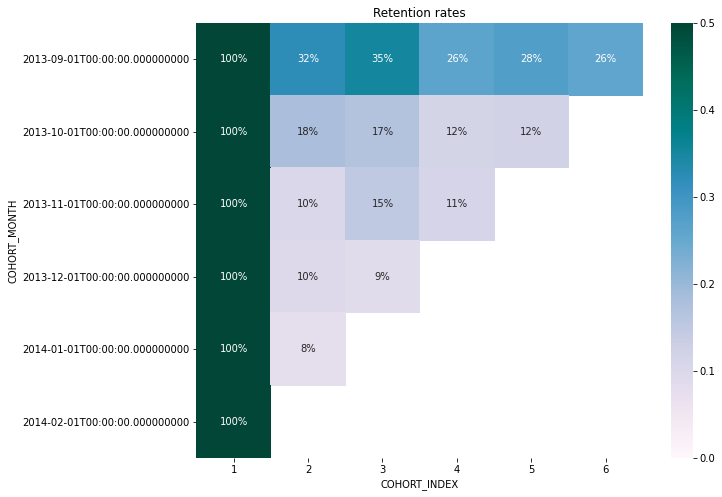

In [17]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.5,
            cmap='PuBuGn')
plt.show()

# RFM SEGMENTATION

In [18]:
r_labels = ['Active', 'Lapsed', 'Inactive', 'Churned']
po_amount_quantiles = pd.qcut(df["PO_AMOUNT"], q=4, labels=r_labels)

In [19]:
df["PO_AMOUNT_QUARTILES"] = po_amount_quantiles

In [20]:
df.sort_values("PO_AMOUNT_QUARTILES").head()

,PO_NUMBER,AGENCY,COMMODITY,VENDOR_NAME,ORDERED_DATE,PO_AMOUNT,ORDER_MONTH,COHORT_MONTH,COHORT_INDEX,PO_AMOUNT_QUARTILES
14945,PO492648,OFFICE OF CAMPAIGN FINANCE,"6156711:CLIPS, PAPER, BALL BEARING",METROPOLITAN OFFICE PRODUCTS,2014-02-28,88.55,2014-02-01,2013-09-01,6,Active
10474,PO488738,DC NATIONAL GUARD,"1958018:CLOCK, WALL, QUARTZ MOVEMENT, BATTERY ...",LASER ART INC,2013-12-23,31.01,2013-12-01,2013-09-01,4,Active
10471,PO488735,OFFICE OF PEOPLE'S COUNSEL,"6151556:BOOKS, PLANNERS, ORGANIZERS, CALENDAR,...",Capital Services and Supplies,2013-12-23,660.72,2013-12-01,2013-09-01,4,Active
10468,PO488732,DISTRICT OF COLUMBIA PUBLIC SCHOOLS,"4857215:APPLICATORS, MOP, WET, RAYON, WAX",MDM Office Systems DBA Standard Office Supply,2013-12-23,435.00,2013-12-01,2013-09-01,4,Active
10463,PO488726,OFFICE OF THE MAYOR,9180600:Administrative Consulting,McMahon Consulting Group,2013-12-23,1125.00,2013-12-01,2013-12-01,1,Active


In [21]:
snapshot_date = max(df.ORDERED_DATE) + dt.timedelta(days=1)

In [22]:
# Aggregating data on a customer level
datamart = df.groupby(['VENDOR_NAME']).agg({
    'ORDERED_DATE': lambda x: (snapshot_date - x.max()).days,
    'AGENCY': 'count',
    'PO_AMOUNT': 'sum'})

In [23]:
# Renaming columns for easier interpretation
datamart.rename(columns={'ORDERED_DATE': 'Recency', 'AGENCY': 'Frequency',
                         'PO_AMOUNT': 'MonetaryValue'}, inplace=True)

In [24]:
datamart.head()

,Recency,Frequency,MonetaryValue
VENDOR_NAME,,,
1001 RESTARAUNT CORPORATION,166,2,2885.94
1125 15TH ST. LLC,47,1,5000.00
1417 N St NE Coop Assoc,116,1,324551.53
19TH STREET BAPTIST CHRUCH,86,1,3200.00
20-20 Captioning & Reporting,135,1,1600.00


In [25]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels=r_labels)
datamart = datamart.assign(R=r_quartiles.values)

In [26]:
f_labels = range(1, 5)
f_quartiles = pd.cut(datamart['Frequency'], 4, labels=f_labels)
datamart = datamart.assign(F=f_quartiles.values)

In [27]:
m_labels = range(1, 5)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels=m_labels)
datamart = datamart.assign(M=m_quartiles.values)

In [28]:
datamart["F"] = datamart["F"].astype('int')
datamart["M"] = datamart["M"].astype('int')

In [29]:
def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

In [30]:
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R', 'F', 'M']].sum(axis=1)

In [31]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
VENDOR_NAME,,,,,,,,
1001 RESTARAUNT CORPORATION,166,2,2885.94,1,1,1,111,3
1125 15TH ST. LLC,47,1,5000.00,3,1,1,311,5
1417 N St NE Coop Assoc,116,1,324551.53,2,1,4,214,7
19TH STREET BAPTIST CHRUCH,86,1,3200.00,2,1,1,211,4
20-20 Captioning & Reporting,135,1,1600.00,1,1,1,111,3


In [32]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
414    446
111    336
112    308
313    292
312    287
211    283
213    282
212    282
314    261
311    258
dtype: int64

In [33]:
datamart.describe()

,Recency,Frequency,MonetaryValue,F,M,RFM_Score
count,4301.000000,4301.000000,4.301000e+03,4301.000000,4301.000000,4301.000000
mean,76.174843,3.475006,4.675750e+05,1.001860,2.499651,6.020693
std,51.593718,19.358458,2.917088e+06,0.060971,1.118268,1.740299
min,1.000000,1.000000,0.000000e+00,1.000000,1.000000,3.000000
25%,30.000000,1.000000,6.375000e+03,1.000000,1.000000,5.000000
50%,73.000000,1.000000,2.926556e+04,1.000000,2.000000,6.000000
75%,117.000000,2.000000,1.564050e+05,1.000000,3.000000,7.000000
max,179.000000,860.000000,8.527498e+07,4.000000,4.000000,12.000000


# RFM VISUALIZATION

C:\Users\Minasyan\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Recency')

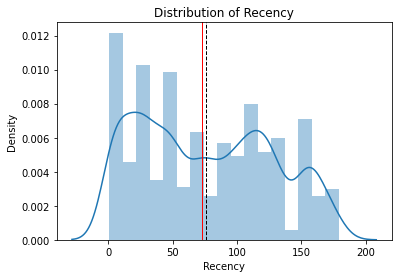

In [34]:
sns.distplot(datamart.Recency)
plt.axvline(datamart.Recency.mean(), color='k',
            linestyle='dashed', linewidth=1)
plt.axvline(datamart.Recency.median(), color='r', linewidth=1)
plt.title('Distribution of Recency')
plt.xlabel("Recency")

C:\Users\Minasyan\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Frequency')

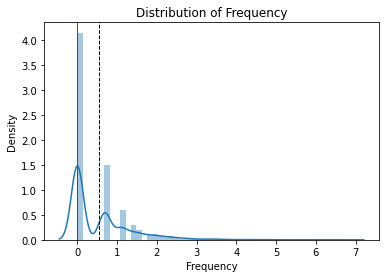

In [35]:
sns.distplot(np.log(datamart.Frequency))
plt.axvline(np.log(datamart.Frequency).mean(),
            color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.log(datamart.Frequency).median(), color='r', linewidth=1)
plt.title('Distribution of Frequency')
plt.xlabel("Frequency")

C:\Users\Minasyan\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Minasyan\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'MonetaryValue')

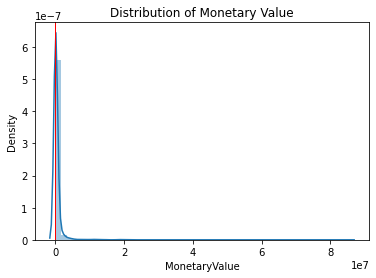

In [36]:
sns.distplot(datamart.MonetaryValue)
plt.axvline(np.log(datamart.MonetaryValue).mean(),
            color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.log(datamart.MonetaryValue).median(), color='r', linewidth=1)
plt.title('Distribution of Monetary Value')
plt.xlabel("MonetaryValue")

In [37]:
datamart.reset_index(level=0, inplace=True)

In [38]:
results = datamart.groupby('RFM_Segment', as_index=False).VENDOR_NAME.count(
).sort_values('VENDOR_NAME', ascending=False)
tops = results.head(10)

C:\Users\Minasyan\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 largest segments')

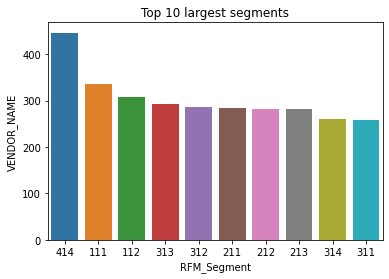

In [39]:
sns.barplot(tops.RFM_Segment, tops.VENDOR_NAME)
plt.title('Top 10 largest segments')

### Marianna Ghazaryan, Shushan Hovakimyan, Seyran Minasyan, Gurgen Hovakimyan